In [1]:
#필요한 모듈 추가 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#데이터 불러오기
df_CARD=pd.read_csv('CARD_SPENDING_RESIDENT.txt',sep='\t')
df_CARD

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194


In [4]:
# 65세 이상 카드 사용 내역만 추출 후 품목별 카드 사용건수 구하기
df_elder=df_CARD[df_CARD['AGE_CD']==65].loc[:,['MCT_CAT_CD','USE_CNT']]
df_elder=pd.pivot_table(data=df_elder, index=['MCT_CAT_CD'],values=['USE_CNT'],aggfunc='sum')
df_elder.fillna(0)

,USE_CNT
MCT_CAT_CD,
10,59156
20,83101
21,66887
22,43405
30,3517
31,1802
32,17460
33,1237509
34,7100


In [5]:
#품목 번호를 품목 명으로 바꾸기
df_elder=df_elder.rename(index={10:'숙박',
                        20:'레저용품',
                        21:'레저업소',
                        22:'문화취미',
                        30:'가구',
                        31:'전기',
                        32:'주방용구',
                        33:'연료판매',
                        34:'광학제품',
                        35:'가전',
                        40:'유통업',
                        42:'의복',
                        43:'직물',
                        44:'신변잡화',
                        50:'서적문구',
                        52:'사무통산',
                        60:'자동차판매',
                        62:'자동차정비',
                        70:'의료기관',
                        71:'보건위생',
                        80:'요식업소',
                        81:'의료식품',
                        92:'수리서비스'})
df_elder

,USE_CNT
MCT_CAT_CD,
숙박,59156
레저용품,83101
레저업소,66887
문화취미,43405
가구,3517
전기,1802
주방용구,17460
연료판매,1237509
광학제품,7100


In [6]:
# 카드 사용건수 오름차순 정렬하기 
df_elder_rank=df_elder.sort_values(by='USE_CNT',axis=0,ascending=False)
df_elder_rank

,USE_CNT
MCT_CAT_CD,
유통업,4298022
요식업소,3049257
의료기관,2395989
연료판매,1237509
의료식품,809901
사무통산,512415
보건위생,210431
의복,196719
자동차정비,144508


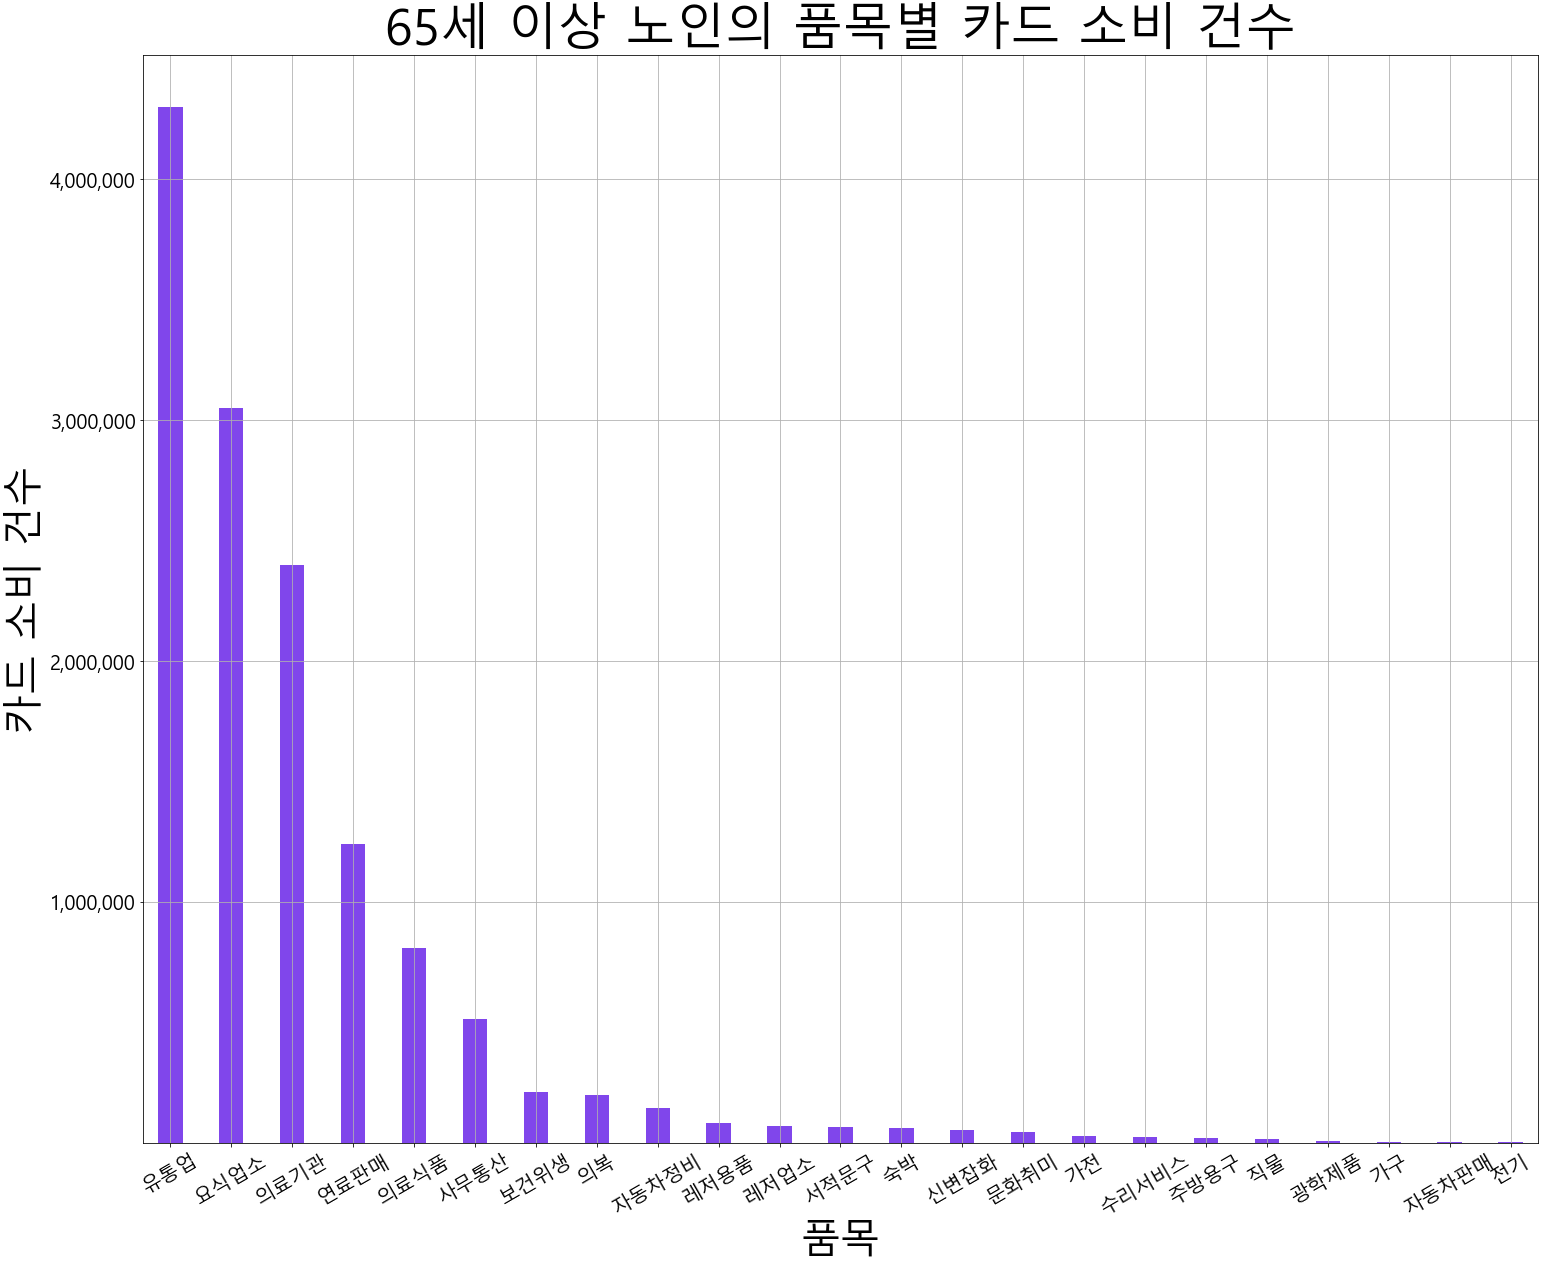

In [8]:
#막대그래프로 품목별 사용건수 시각화하기 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"]=20
plt.rcParams["figure.figsize"]=(25,20)

df_elder_rank['USE_CNT'].plot.bar(color='#8046eb',rot=0,width=0.4)
plt.grid()
plt.title("65세 이상 노인의 품목별 카드 소비 건수", fontsize="50")
plt.xlabel("품목", fontsize="40")
plt.xticks(rotation=30)
plt.ylabel("카드 소비 건수", fontsize="40")
plt.yticks([1000000,2000000,3000000,4000000],['1,000,000','2,000,000','3,000,000','4,000,000'])
plt.show()